In [6]:
#!pip install missingno

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [8]:
df = pd.read_csv('Customer Churn/E-Commerce-Dataset.csv')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [9]:
df.shape

(5630, 20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [11]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

# EDA - Исследовательский анализ данных

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


# Проверка пропусков и выбросов в данных

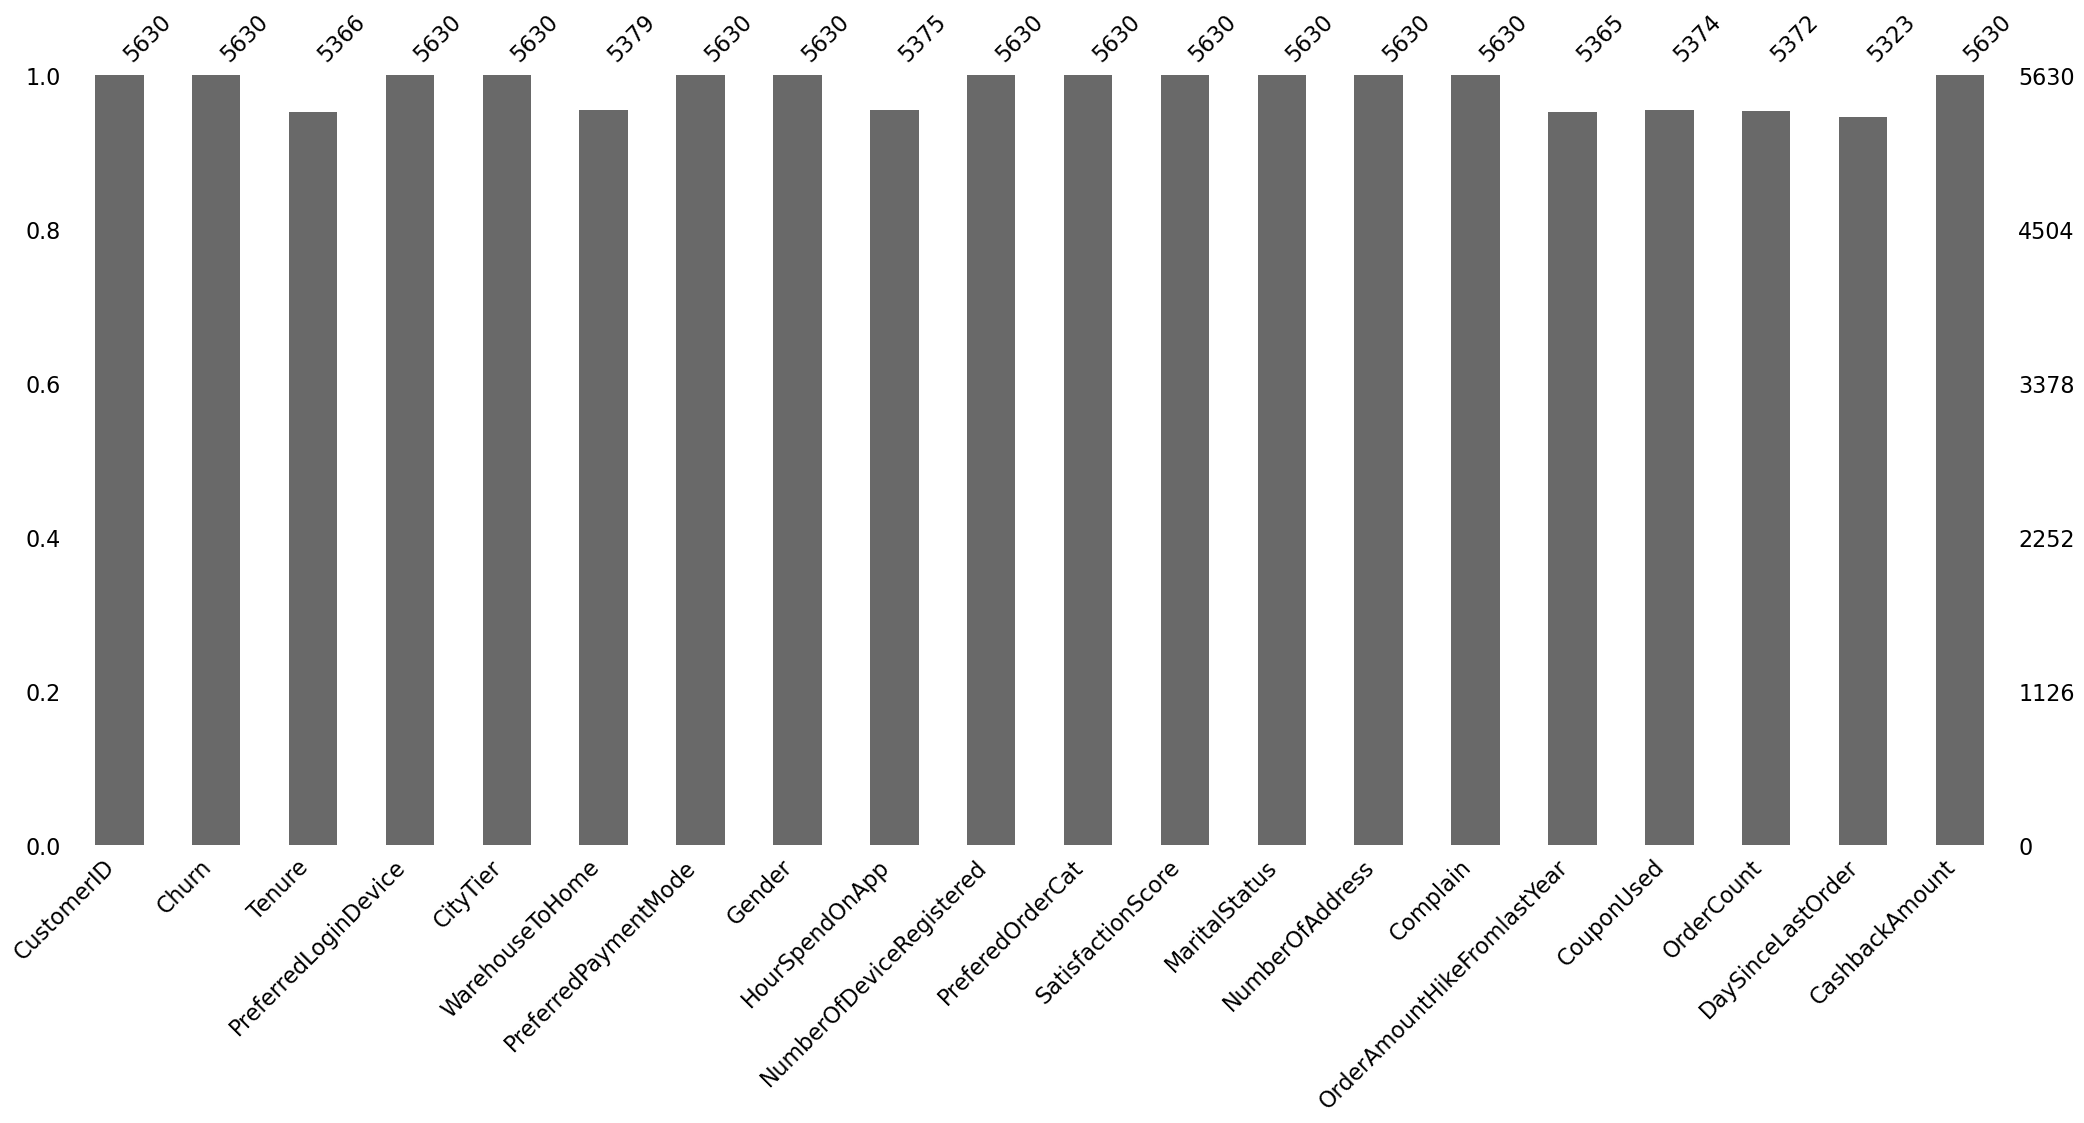

In [14]:
msno.bar(df)
plt.show()

In [15]:
missing_data = df.isnull().sum()
print('Пропуски в данных: \n', missing_data)

Пропуски в данных: 
 CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


Tenure, WarehouseToHome, HourSpendOnApp, DaySinceLastOrder:

Эти переменные являются количественными и важны для анализа поведения клиентов. Заполним пропуски медианой, так как она менее подвержена влиянию выбросов, чем среднее.

In [16]:
print('Tenure', df['Tenure'].value_counts().unique())
print('WarehouseToHome', df['WarehouseToHome'].value_counts().unique())
print(df['HourSpendOnApp'].value_counts())
print('DaySinceLastOrder',df['DaySinceLastOrder'].value_counts().unique())

Tenure [690 508 263 247 221 213 204 203 195 194 183 182 181 176 167 159 149 140
 123 109 106  89  84  76  75  70  66  60  59  55  49   1]
WarehouseToHome [559 444 389 322 299 295 288 274 249 233 221 217 104 101  96  94  93  89
  86  85  81  75  74  71  67  63  51   8   1]
HourSpendOnApp
3.0    2687
2.0    1471
4.0    1176
1.0      35
0.0       3
5.0       3
Name: count, dtype: int64
DaySinceLastOrder [900 792 614 538 496 447 431 299 228 157 113  91  69  51  35  19  17  13
  10   1]


In [17]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

OrderAmountHikeFromlastYear, CouponUsed, OrderCount:

Эти переменные связаны с заказами и покупками. Для них также применим медиану, поскольку она помогает скорректировать влияние выбросов.

In [18]:
df['OrderAmountHikeFromlastYear'].value_counts()
df['CouponUsed'].value_counts()
df['OrderCount'].value_counts()

OrderCount
2.0     2025
1.0     1751
3.0      371
7.0      206
4.0      204
5.0      181
8.0      172
6.0      137
9.0       62
12.0      54
11.0      51
10.0      36
14.0      36
15.0      33
13.0      30
16.0      23
Name: count, dtype: int64

In [19]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].median())
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].median())

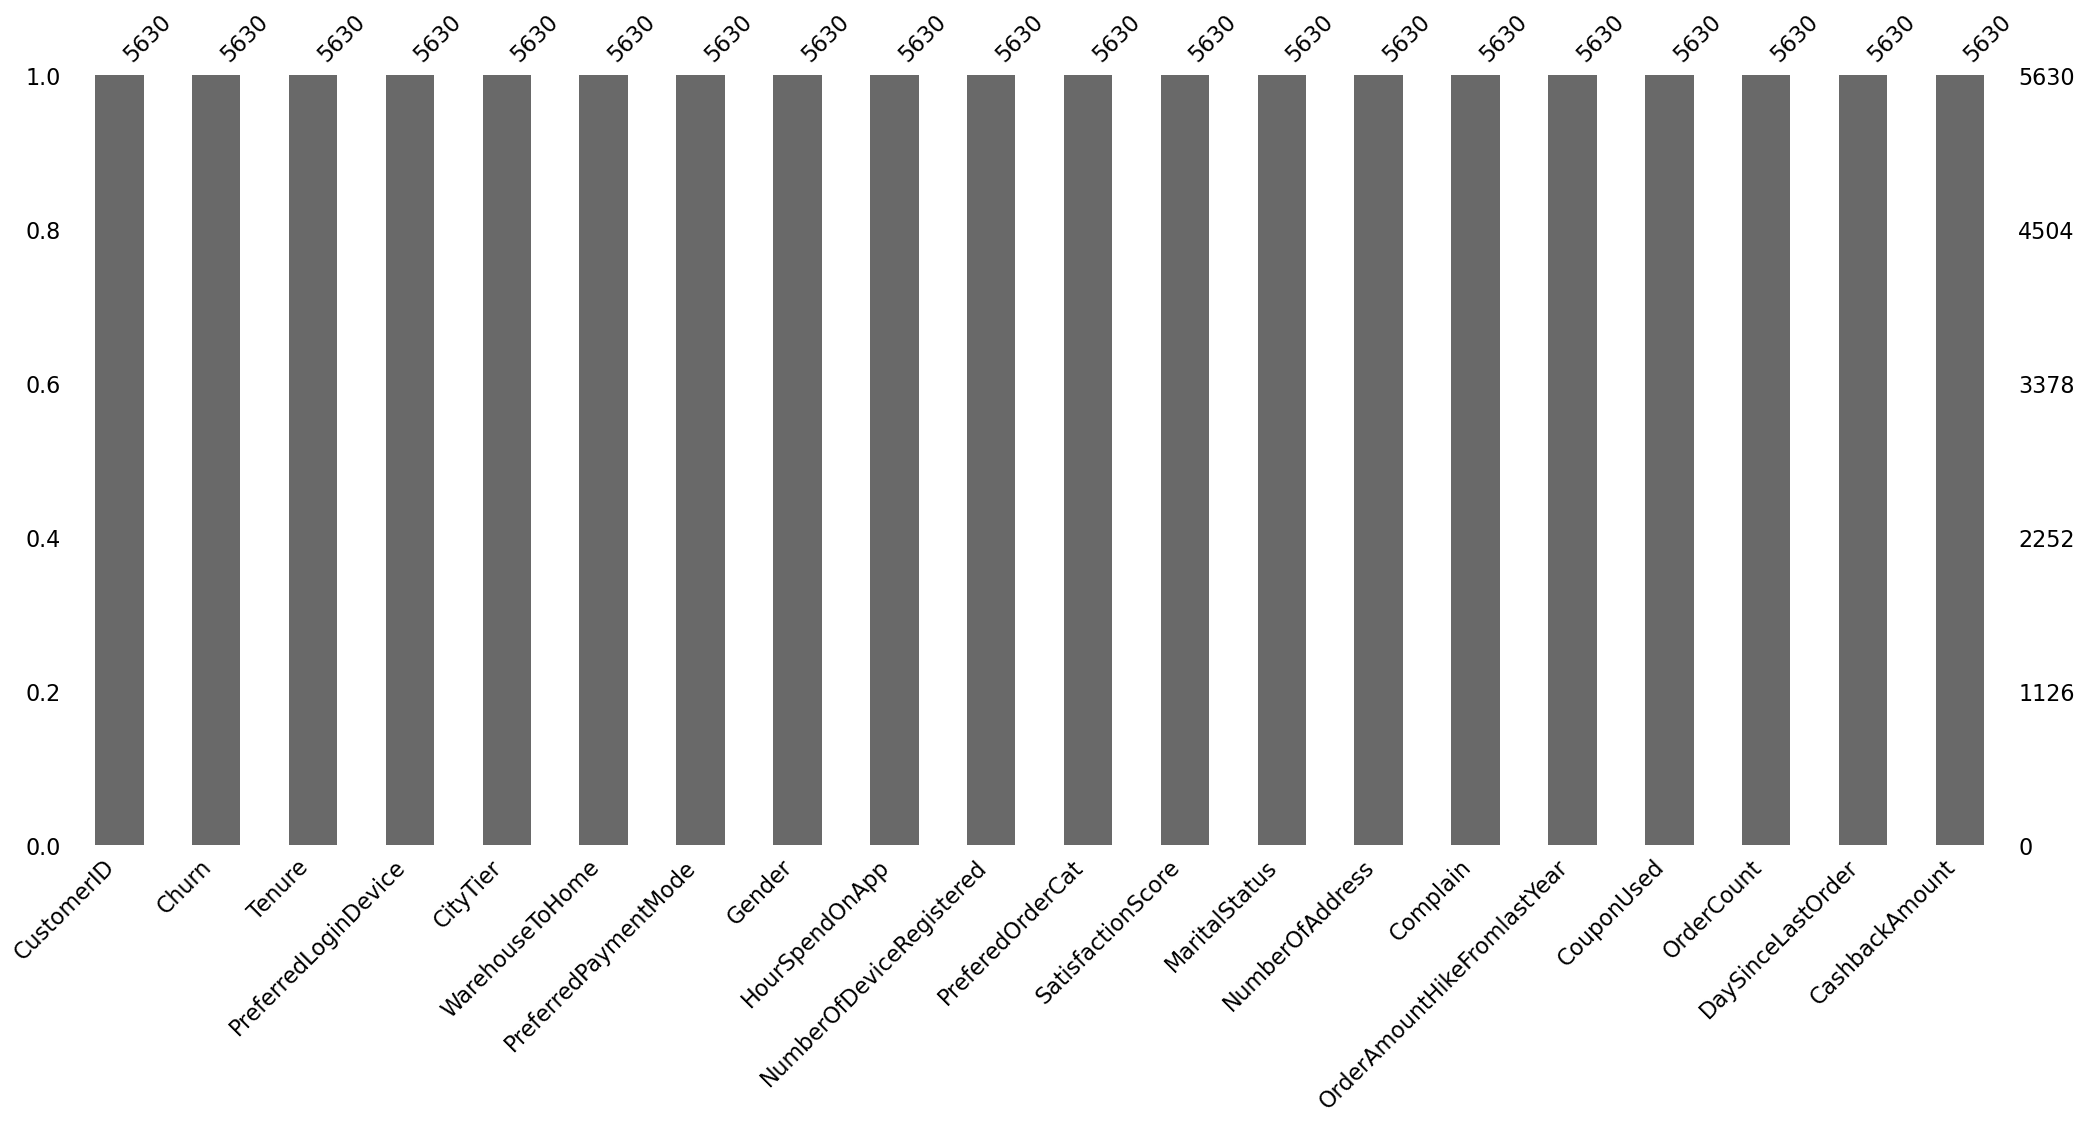

In [20]:
msno.bar(df)
plt.show()

In [21]:
churn_rate = df['Churn'].value_counts()/len(df) * 100

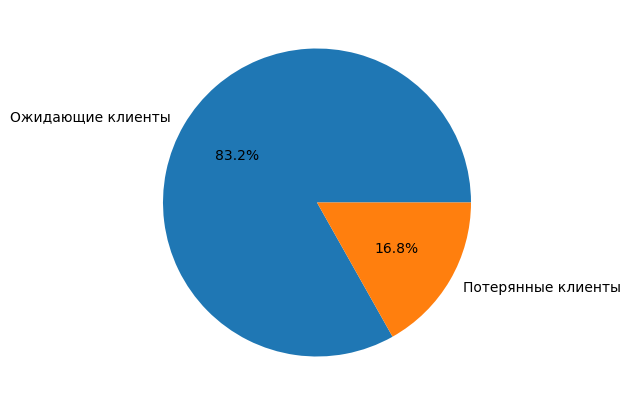

In [22]:
plt.figure(figsize = (5,5))
plt.pie(churn_rate, labels = ['Ожидающие клиенты', 'Потерянные клиенты'], autopct='%1.1f%%')
plt.show()

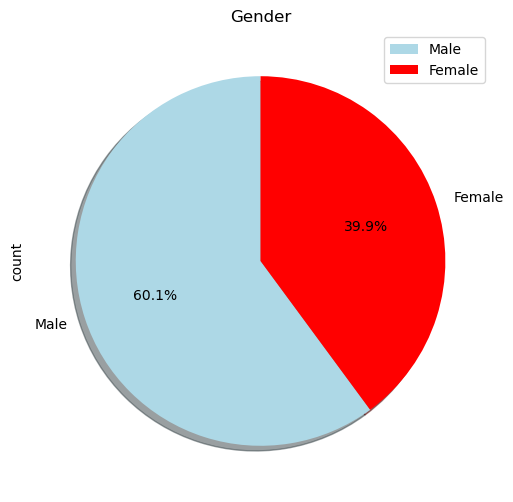

In [23]:
color = ['lightblue', 'red']
df['Gender'].value_counts().plot(kind='pie',
                                        colors = color,
                                        figsize=(8,6),
                                        autopct='%1.1f%%',
                                        shadow = True,
                                        startangle=90)
plt.title("Gender")
plt.legend()
plt.show()

In [24]:
df[['Tenure']].describe()

,Tenure
count,5630.000000
mean,10.134103
std,8.357951
min,0.000000
25%,3.000000
50%,9.000000
75%,15.000000
max,61.000000


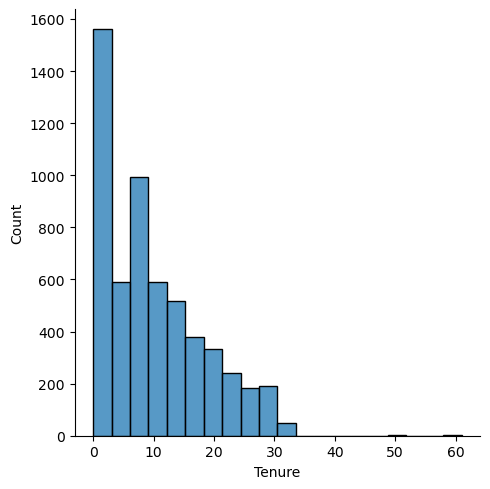

In [28]:
sns.displot(df, x="Tenure", binwidth=3);

In [29]:
correlation = df[['Churn','Tenure', 'CityTier', 'WarehouseToHome','HourSpendOnApp',
       'NumberOfDeviceRegistered','SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount','DaySinceLastOrder', 'CashbackAmount']]

In [30]:
correlation.corr()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.337831,0.084703,0.069544,0.018816,0.107939,0.105481,0.043931,0.250188,-0.007075,-0.001430,-0.024038,-0.155871,-0.154161
Tenure,-0.337831,1.000000,-0.057895,-0.012191,-0.017282,-0.020657,-0.014452,0.235076,-0.020535,-0.005542,0.101535,0.165339,0.174378,0.468178
CityTier,0.084703,-0.057895,1.000000,0.013576,-0.009921,0.027934,-0.011554,-0.029440,0.003375,-0.028890,0.022629,0.033551,0.010214,0.055698
WarehouseToHome,0.069544,-0.012191,0.013576,1.000000,0.064069,0.023020,0.007524,-0.008305,0.026825,0.038311,0.002675,0.000354,0.020253,0.000090
HourSpendOnApp,0.018816,-0.017282,-0.009921,0.064069,1.000000,0.305048,0.030937,0.139541,0.006607,0.099305,0.187166,0.102053,0.061213,0.114268
NumberOfDeviceRegistered,0.107939,-0.020657,0.027934,0.023020,0.305048,1.000000,-0.017228,0.084997,0.003407,0.065714,0.152065,0.099790,0.007350,0.137396
SatisfactionScore,0.105481,-0.014452,-0.011554,0.007524,0.030937,-0.017228,1.000000,0.053583,-0.031115,-0.027121,0.017423,0.018166,0.031985,0.003429
NumberOfAddress,0.043931,0.235076,-0.029440,-0.008305,0.139541,0.084997,0.053583,1.000000,-0.026399,0.012161,0.036985,-0.013970,-0.067180,0.186802
Complain,0.250188,-0.020535,0.003375,0.026825,0.006607,0.003407,-0.031115,-0.026399,1.000000,-0.003842,-0.007810,-0.021288,-0.041415,0.000598
OrderAmountHikeFromlastYear,-0.007075,-0.005542,-0.028890,0.038311,0.099305,0.065714,-0.027121,0.012161,-0.003842,1.000000,0.024482,0.010567,-0.004621,-0.009541


In [31]:
correlation.corrwith(df['Churn'])

Churn                          1.000000
Tenure                        -0.337831
CityTier                       0.084703
WarehouseToHome                0.069544
HourSpendOnApp                 0.018816
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
NumberOfAddress                0.043931
Complain                       0.250188
OrderAmountHikeFromlastYear   -0.007075
CouponUsed                    -0.001430
OrderCount                    -0.024038
DaySinceLastOrder             -0.155871
CashbackAmount                -0.154161
dtype: float64

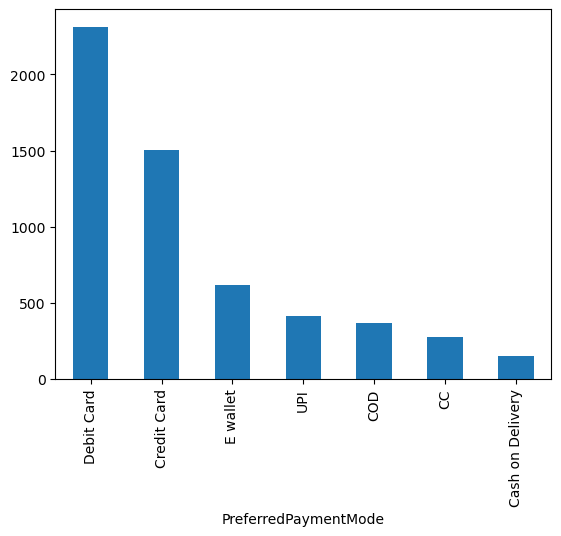

In [32]:
df['PreferredPaymentMode'].value_counts().plot(kind = 'bar')
plt.show()

- UPI (Unified Payments Interface) — это система мгновенных платежей, разработанная Национальной платежной корпорацией Индии (NPCI), которая позволяет пользователям осуществлять межбанковские транзакции через мобильные устройства. С помощью UPI можно мгновенно переводить деньги с одного банковского счета на другой без необходимости вводить банковские реквизиты получателя.Основные преимущества UPI:
    Мгновенные платежи: Перевод средств происходит моментально.
    Удобство: Не требуется вводить длинные номера счетов или IFSC-коды. Для перевода достаточно номера телефона, UPI ID или QR-кода.
    Безопасность: Транзакции защищены через PIN-код UPI и двухфакторную аутентификацию.

- COD (Cash on Delivery) — это способ оплаты, при котором покупатель оплачивает товар наличными непосредственно при его доставке. Этот метод широко используется в электронной коммерции, когда покупатели предпочитают сначала получить товар и только потом оплатить его, что снижает риски при покупке через интернет.

    Основные особенности COD:

    Удобство: Покупателю не нужно оплачивать товар заранее; он платит при получении.
    Безопасность: Покупатель может убедиться в целостности и качестве товара перед оплатой.
    Популярность: COD особенно популярен в странах, где пользователи могут быть осторожны с онлайн-платежами.

- Кредитная карта — это банковская карта, которая позволяет держателю занимать средства у банка для оплаты товаров и услуг, с последующей обязанностью вернуть деньги, обычно с процентами.
- 
E-Wallet (электронный кошелек) — это цифровое приложение или сервис, который позволяет пользователю хранить деньги, а также управлять платежами и финансовыми транзакциями в интернете. С помощью e-wallet пользователи могут совершать покупки, оплачивать услуги, переводить деньги другим пользователям или пополнять свои счета без необходимости использовать физическую карту или наличные.
Примеры популярных e-wallets:
    PayPal
    Apple Pay
    Google Pay
    Samsung Pay
    Alipay

In [33]:
debit_card = df[df.PreferredPaymentMode == 'Debit Card']

In [34]:
debit_card.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
9,50010,1,9.0,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [35]:
debit_card.shape

(2314, 20)

In [36]:
credit_card = df[df.PreferredPaymentMode == 'Credit Card']
credit_card.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
14,50015,1,9.0,Mobile Phone,3,15.0,Credit Card,Male,3.0,4,Fashion,2,Single,2,0,16.0,0.0,4.0,7.0,196
21,50022,1,20.0,Mobile Phone,1,29.0,Credit Card,Female,3.0,3,Fashion,2,Divorced,2,0,12.0,11.0,15.0,6.0,203
25,50026,1,0.0,Phone,1,15.0,Credit Card,Female,2.0,3,Mobile Phone,5,Single,8,0,22.0,1.0,1.0,4.0,142
31,50032,0,0.0,Mobile Phone,1,13.0,Credit Card,Male,2.0,4,Laptop & Accessory,3,Divorced,3,0,17.0,1.0,1.0,0.0,161
55,50056,0,4.0,Phone,1,18.0,Credit Card,Female,3.0,3,Mobile Phone,2,Divorced,9,1,23.0,1.0,1.0,2.0,139


In [37]:
credit_card.shape

(1501, 20)

In [38]:
e_wallet = df[df.PreferredPaymentMode == 'E wallet']
e_wallet.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,3.0,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
17,50018,1,0.0,Mobile Phone,3,11.0,E wallet,Male,2.0,4,Laptop & Accessory,3,Single,2,1,11.0,1.0,1.0,3.0,157
22,50023,1,9.0,Mobile Phone,3,28.0,E wallet,Male,2.0,3,Mobile Phone,3,Single,2,1,19.0,0.0,1.0,0.0,117
26,50027,0,8.0,Mobile Phone,3,6.0,E wallet,Male,3.0,3,Fashion,4,Divorced,2,0,13.0,1.0,1.0,6.0,173
27,50028,0,9.0,Phone,3,12.0,E wallet,Male,2.0,3,Laptop & Accessory,3,Divorced,3,1,20.0,0.0,4.0,5.0,123


In [39]:
e_wallet.shape

(614, 20)

In [40]:
upi = df[df.PreferredPaymentMode == 'UPI']
upi.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
15,50016,1,9.0,Phone,2,12.0,UPI,Male,3.0,3,Mobile,5,Married,5,1,22.0,1.0,1.0,2.0,121
97,50098,0,10.0,Computer,1,17.0,UPI,Male,2.0,3,Fashion,2,Married,2,1,14.0,0.0,1.0,3.0,222
119,50120,0,18.0,Mobile Phone,1,6.0,UPI,Male,3.0,2,Others,2,Divorced,1,0,15.0,1.0,1.0,7.0,292
185,50186,0,4.0,Mobile Phone,2,8.0,UPI,Male,3.0,4,Laptop & Accessory,5,Divorced,4,0,12.0,0.0,1.0,0.0,164


In [41]:
upi.shape

(414, 20)

In [42]:
cod = df[df.PreferredPaymentMode == 'COD']
cod.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134
30,50031,0,2.0,Computer,1,6.0,COD,Male,2.0,3,Laptop & Accessory,3,Divorced,2,0,13.0,0.0,1.0,9.0,143
45,50046,0,0.0,Phone,1,23.0,COD,Male,3.0,3,Mobile,4,Divorced,1,1,16.0,1.0,1.0,1.0,131
46,50047,1,0.0,Computer,3,14.0,COD,Female,3.0,5,Mobile,5,Single,1,0,21.0,1.0,1.0,0.0,123
74,50075,0,11.0,Mobile Phone,1,35.0,COD,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,18.0,0.0,1.0,7.0,163


In [43]:
cod.shape

(365, 20)

In [44]:
cc = df[df.PreferredPaymentMode == 'CC']
cc.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
7,50008,1,9.0,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
13,50014,1,0.0,Phone,1,15.0,CC,Male,3.0,4,Mobile,3,Divorced,1,1,17.0,0.0,1.0,0.0,134
32,50033,0,30.0,Phone,1,15.0,CC,Female,3.0,4,Mobile,4,Divorced,5,1,20.0,1.0,1.0,0.0,133
35,50036,0,0.0,Phone,1,14.0,CC,Male,3.0,3,Mobile,2,Divorced,2,0,24.0,0.0,2.0,2.0,123


In [45]:
cc.shape

(273, 20)

In [46]:
cash_on_delivery = df[df.PreferredPaymentMode == 'Cash on Delivery']
cash_on_delivery.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
6,50007,1,9.0,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
10,50011,1,4.0,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,3,Divorced,2,0,15.0,9.0,15.0,8.0,295
92,50093,1,9.0,Phone,1,6.0,Cash on Delivery,Male,2.0,3,Mobile,3,Single,1,0,14.0,0.0,1.0,5.0,121
106,50107,0,15.0,Mobile Phone,1,10.0,Cash on Delivery,Male,2.0,3,Others,2,Divorced,2,0,15.0,0.0,11.0,15.0,292
126,50127,0,12.0,Computer,1,8.0,Cash on Delivery,Female,3.0,3,Fashion,3,Single,1,0,25.0,10.0,11.0,3.0,209


In [47]:
cash_on_delivery.shape

(149, 20)

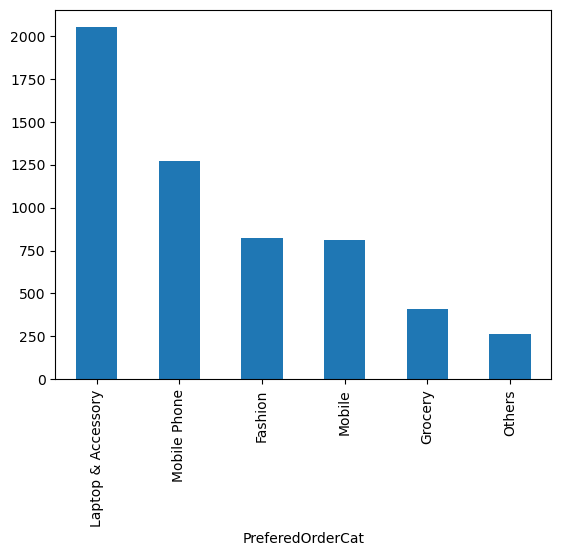

In [48]:
df['PreferedOrderCat'].value_counts().plot(kind = 'bar')
plt.show()

In [49]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [55]:
df.drop(columns = ['CustomerID'], inplace = True)

In [58]:
df = df.replace({'Gender':{'Female': 0, 'Male':1}, 'MaritalStatus': {'Divorced': 0, 'Single': 1, 'Married': 2}})

C:\Users\HP\AppData\Local\Temp\ipykernel_12560\2082560998.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Gender':{'Female': 0, 'Male':1}, 'MaritalStatus': {'Divorced': 0, 'Single': 1, 'Married': 2}})


In [56]:
df.MaritalStatus.value_counts()

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64

In [59]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,0,3.0,3,Laptop & Accessory,2,1,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,1,3.0,4,Mobile,3,1,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit Card,1,2.0,4,Mobile,3,1,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,1,2.0,4,Laptop & Accessory,5,1,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,1,3.0,3,Mobile,5,1,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,1,3.0,2,Laptop & Accessory,1,2,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,1,3.0,5,Fashion,5,2,6,0,16.0,1.0,2.0,3.0,225
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,1,3.0,2,Laptop & Accessory,4,2,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit Card,1,4.0,5,Laptop & Accessory,4,2,4,0,15.0,2.0,2.0,9.0,179


In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(df.select_dtypes(include=['object']))

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out())
data_encoded_one = df.drop(columns=df.select_dtypes(include=['object']).columns)
df = pd.concat([data_encoded_one, encoded_df], axis=1)

df.head()

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,...,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,1,4.0,3,6.0,0,3.0,3,2,1,9,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,9.0,1,8.0,1,3.0,4,3,1,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,9.0,1,30.0,1,2.0,4,3,1,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0.0,3,15.0,1,2.0,4,5,1,8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.0,1,12.0,1,3.0,3,5,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 28)
(1126, 28)
(4504,)
(1126,)


### StandardScaler

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Classification

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Accuracy: 0.9014209591474245
ROC_AUC: 0.8968147743918202


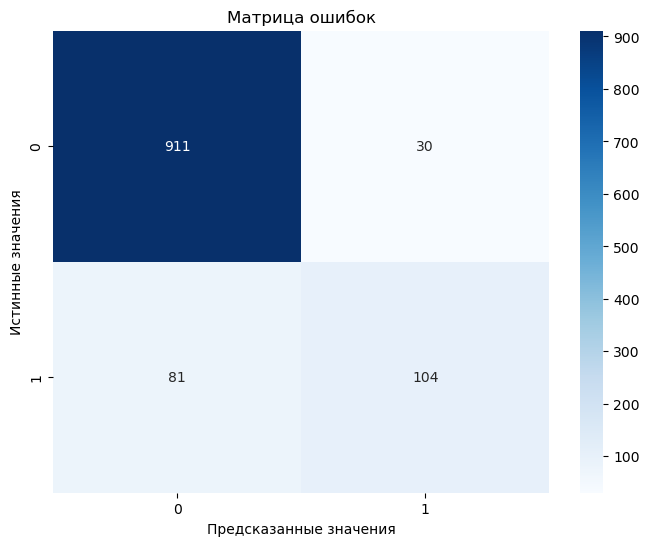

In [67]:
LR_model = LogisticRegression(max_iter = 1000, random_state=42)
LR_model.fit(X_train, y_train)

y_pred_lr = LR_model.predict(X_test)
y_pred_lr_proba = LR_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_lr)
roc_auc_lr_proba = roc_auc_score(y_test, y_pred_lr_proba)

print(f"Accuracy: {accuracy}")
print(f"ROC_AUC: {roc_auc_lr_proba}")

conf_matrix = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок')
plt.show()

precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

Accuracy: 0.88898756660746
ROC_AUC: 0.7186173421029957


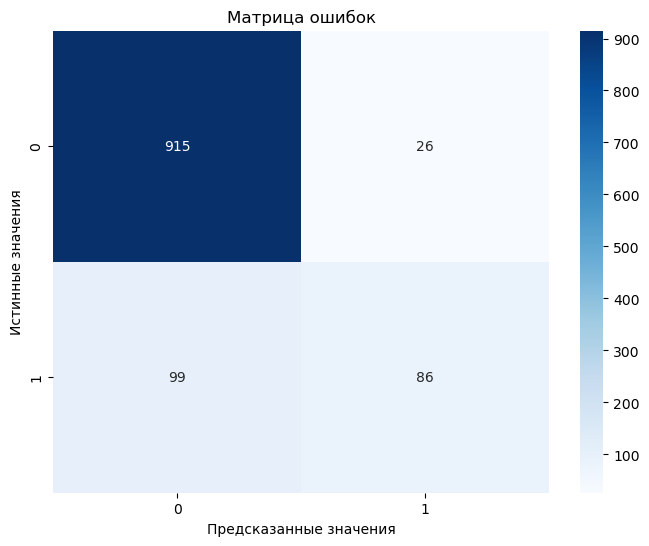

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

print(f"Accuracy: {accuracy}")
print(f"ROC_AUC: {roc_auc_knn}")

conf_matrix = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок')
plt.show()

precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

Accuracy: 0.9031971580817052
ROC_AUC: 0.8931096877961917


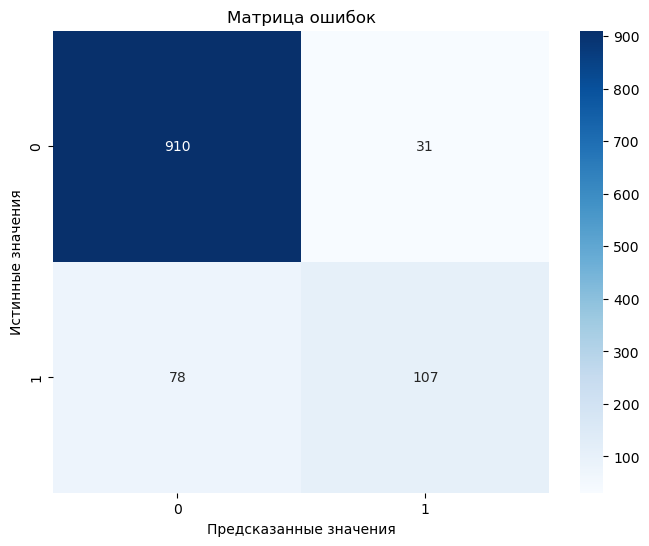

In [70]:
tree_model = DecisionTreeClassifier(max_depth=6)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
y_pred_tree_proba = tree_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_tree)
roc_auc_tree_proba = roc_auc_score(y_test, y_pred_tree_proba)

print(f"Accuracy: {accuracy}")
print(f"ROC_AUC: {roc_auc_tree_proba}")

conf_matrix = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок')
plt.show()

precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)

In [71]:
RF_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=0)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_model_rf = grid_search.best_estimator_

Лучшие параметры: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


Accuracy: 0.968
ROC_AUC: 0.9889048453341758


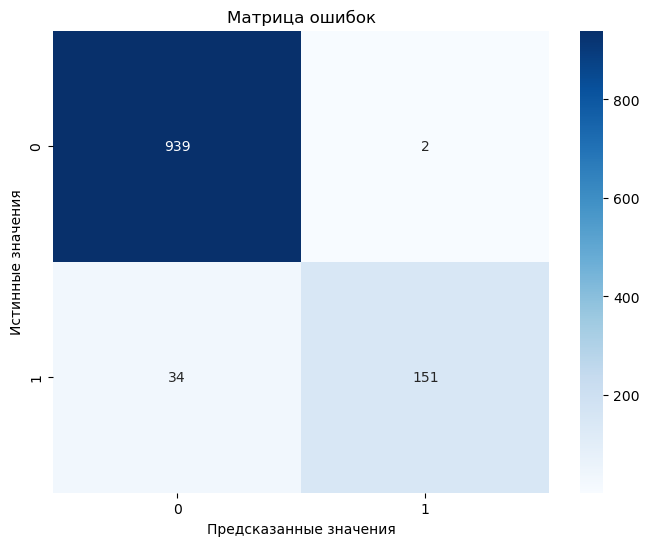

In [72]:
y_pred_forest = best_model_rf.predict(X_test)
y_pred_forest_proba = best_model_rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_tree)
roc_auc_forest_proba = roc_auc_score(y_test, y_pred_forest_proba)

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_forest))
print(f"ROC_AUC: {roc_auc_forest_proba}")

conf_matrix = confusion_matrix(y_test, y_pred_forest)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок')
plt.show()

precision = precision_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)
f1 = f1_score(y_test, y_pred_forest)

In [73]:
catboost_model = CatBoostClassifier(random_state=42)

param_grid = {
    'iterations': [500, 1000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5],
}


grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=0
)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_model_cat = grid_search.best_estimator_

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\HP\anaconda3\Lib\site-packages\catboost\core.py", line 2410, in _fit

0:	learn: 0.6002074	total: 147ms	remaining: 2m 26s
1:	learn: 0.5193258	total: 156ms	remaining: 1m 17s
2:	learn: 0.4626454	total: 167ms	remaining: 55.4s
3:	learn: 0.4194435	total: 175ms	remaining: 43.5s
4:	learn: 0.3805856	total: 184ms	remaining: 36.6s
5:	learn: 0.3513044	total: 193ms	remaining: 31.9s
6:	learn: 0.3296419	total: 200ms	remaining: 28.3s
7:	learn: 0.3105113	total: 207ms	remaining: 25.7s
8:	learn: 0.2941619	total: 214ms	remaining: 23.6s
9:	learn: 0.2777797	total: 221ms	remaining: 21.9s
10:	learn: 0.2660277	total: 228ms	remaining: 20.5s
11:	learn: 0.2543402	total: 235ms	remaining: 19.4s
12:	learn: 0.2423474	total: 242ms	remaining: 18.4s
13:	learn: 0.2366550	total: 250ms	remaining: 17.6s
14:	learn: 0.2284353	total: 257ms	remaining: 16.9s
15:	learn: 0.2213716	total: 264ms	remaining: 16.2s
16:	learn: 0.2161185	total: 271ms	remaining: 15.7s
17:	learn: 0.2114273	total: 279ms	remaining: 15.2s
18:	learn: 0.2079824	total: 286ms	remaining: 14.8s
19:	learn: 0.2023534	total: 293ms	remai

166:	learn: 0.0304483	total: 1.37s	remaining: 6.83s
167:	learn: 0.0302061	total: 1.38s	remaining: 6.83s
168:	learn: 0.0302053	total: 1.39s	remaining: 6.81s
169:	learn: 0.0298998	total: 1.39s	remaining: 6.8s
170:	learn: 0.0296217	total: 1.4s	remaining: 6.78s
171:	learn: 0.0289561	total: 1.41s	remaining: 6.77s
172:	learn: 0.0285988	total: 1.41s	remaining: 6.76s
173:	learn: 0.0282255	total: 1.42s	remaining: 6.74s
174:	learn: 0.0279712	total: 1.43s	remaining: 6.73s
175:	learn: 0.0279063	total: 1.43s	remaining: 6.71s
176:	learn: 0.0276454	total: 1.44s	remaining: 6.7s
177:	learn: 0.0274941	total: 1.45s	remaining: 6.68s
178:	learn: 0.0271006	total: 1.45s	remaining: 6.66s
179:	learn: 0.0269160	total: 1.46s	remaining: 6.65s
180:	learn: 0.0268004	total: 1.47s	remaining: 6.64s
181:	learn: 0.0265710	total: 1.47s	remaining: 6.62s
182:	learn: 0.0264340	total: 1.48s	remaining: 6.62s
183:	learn: 0.0262467	total: 1.49s	remaining: 6.61s
184:	learn: 0.0260565	total: 1.5s	remaining: 6.6s
185:	learn: 0.025

334:	learn: 0.0092889	total: 2.63s	remaining: 5.21s
335:	learn: 0.0092424	total: 2.63s	remaining: 5.2s
336:	learn: 0.0091853	total: 2.65s	remaining: 5.2s
337:	learn: 0.0091248	total: 2.65s	remaining: 5.2s
338:	learn: 0.0090668	total: 2.66s	remaining: 5.19s
339:	learn: 0.0090433	total: 2.67s	remaining: 5.18s
340:	learn: 0.0089896	total: 2.67s	remaining: 5.17s
341:	learn: 0.0089517	total: 2.68s	remaining: 5.16s
342:	learn: 0.0088971	total: 2.69s	remaining: 5.15s
343:	learn: 0.0088200	total: 2.7s	remaining: 5.14s
344:	learn: 0.0087683	total: 2.7s	remaining: 5.13s
345:	learn: 0.0087581	total: 2.71s	remaining: 5.12s
346:	learn: 0.0087082	total: 2.72s	remaining: 5.11s
347:	learn: 0.0086113	total: 2.73s	remaining: 5.11s
348:	learn: 0.0085708	total: 2.73s	remaining: 5.1s
349:	learn: 0.0085048	total: 2.74s	remaining: 5.09s
350:	learn: 0.0084618	total: 2.75s	remaining: 5.08s
351:	learn: 0.0084054	total: 2.75s	remaining: 5.07s
352:	learn: 0.0083617	total: 2.76s	remaining: 5.06s
353:	learn: 0.0083

501:	learn: 0.0047475	total: 3.87s	remaining: 3.84s
502:	learn: 0.0047266	total: 3.88s	remaining: 3.83s
503:	learn: 0.0047231	total: 3.89s	remaining: 3.83s
504:	learn: 0.0047102	total: 3.89s	remaining: 3.82s
505:	learn: 0.0046876	total: 3.9s	remaining: 3.81s
506:	learn: 0.0046755	total: 3.91s	remaining: 3.8s
507:	learn: 0.0046605	total: 3.92s	remaining: 3.79s
508:	learn: 0.0046419	total: 3.92s	remaining: 3.79s
509:	learn: 0.0046390	total: 3.93s	remaining: 3.78s
510:	learn: 0.0046191	total: 3.94s	remaining: 3.77s
511:	learn: 0.0046133	total: 3.94s	remaining: 3.76s
512:	learn: 0.0045953	total: 3.96s	remaining: 3.75s
513:	learn: 0.0045856	total: 3.96s	remaining: 3.75s
514:	learn: 0.0045717	total: 3.97s	remaining: 3.74s
515:	learn: 0.0045515	total: 3.98s	remaining: 3.73s
516:	learn: 0.0045372	total: 3.98s	remaining: 3.72s
517:	learn: 0.0045284	total: 3.99s	remaining: 3.71s
518:	learn: 0.0045252	total: 4s	remaining: 3.71s
519:	learn: 0.0045150	total: 4.01s	remaining: 3.7s
520:	learn: 0.0044

668:	learn: 0.0029329	total: 5.12s	remaining: 2.53s
669:	learn: 0.0029282	total: 5.13s	remaining: 2.53s
670:	learn: 0.0029186	total: 5.14s	remaining: 2.52s
671:	learn: 0.0029086	total: 5.14s	remaining: 2.51s
672:	learn: 0.0029009	total: 5.15s	remaining: 2.5s
673:	learn: 0.0028960	total: 5.16s	remaining: 2.5s
674:	learn: 0.0028874	total: 5.17s	remaining: 2.49s
675:	learn: 0.0028815	total: 5.17s	remaining: 2.48s
676:	learn: 0.0028742	total: 5.18s	remaining: 2.47s
677:	learn: 0.0028679	total: 5.19s	remaining: 2.46s
678:	learn: 0.0028626	total: 5.2s	remaining: 2.46s
679:	learn: 0.0028576	total: 5.2s	remaining: 2.45s
680:	learn: 0.0028526	total: 5.21s	remaining: 2.44s
681:	learn: 0.0028482	total: 5.22s	remaining: 2.43s
682:	learn: 0.0028393	total: 5.22s	remaining: 2.42s
683:	learn: 0.0028359	total: 5.23s	remaining: 2.42s
684:	learn: 0.0028307	total: 5.24s	remaining: 2.41s
685:	learn: 0.0028254	total: 5.24s	remaining: 2.4s
686:	learn: 0.0028211	total: 5.25s	remaining: 2.39s
687:	learn: 0.002

827:	learn: 0.0021939	total: 6.38s	remaining: 1.32s
828:	learn: 0.0021939	total: 6.39s	remaining: 1.32s
829:	learn: 0.0021939	total: 6.39s	remaining: 1.31s
830:	learn: 0.0021897	total: 6.4s	remaining: 1.3s
831:	learn: 0.0021830	total: 6.4s	remaining: 1.29s
832:	learn: 0.0021830	total: 6.41s	remaining: 1.28s
833:	learn: 0.0021802	total: 6.42s	remaining: 1.28s
834:	learn: 0.0021801	total: 6.42s	remaining: 1.27s
835:	learn: 0.0021801	total: 6.43s	remaining: 1.26s
836:	learn: 0.0021801	total: 6.43s	remaining: 1.25s
837:	learn: 0.0021778	total: 6.44s	remaining: 1.24s
838:	learn: 0.0021726	total: 6.44s	remaining: 1.24s
839:	learn: 0.0021655	total: 6.45s	remaining: 1.23s
840:	learn: 0.0021631	total: 6.46s	remaining: 1.22s
841:	learn: 0.0021593	total: 6.46s	remaining: 1.21s
842:	learn: 0.0021549	total: 6.47s	remaining: 1.2s
843:	learn: 0.0021498	total: 6.47s	remaining: 1.2s
844:	learn: 0.0021497	total: 6.48s	remaining: 1.19s
845:	learn: 0.0021488	total: 6.49s	remaining: 1.18s
846:	learn: 0.002

Лучшие параметры: {'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


Accuracy: 0.983
ROC_AUC: 0.9956687824913117


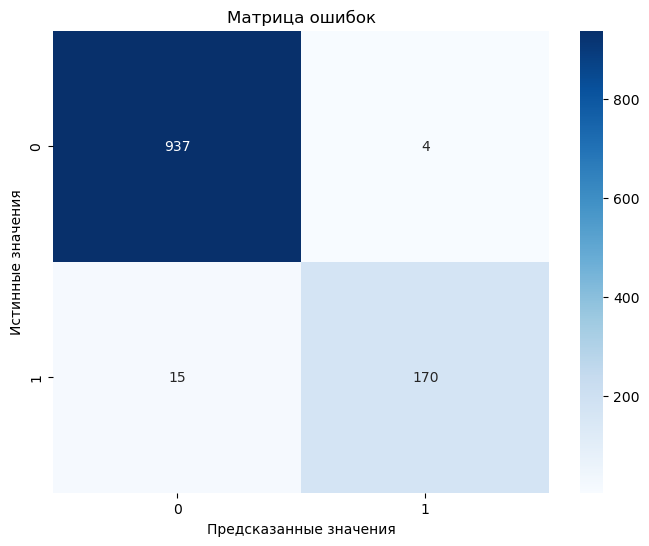

In [74]:
y_pred_catboost = best_model_cat.predict(X_test)
y_pred_cat_proba = best_model_cat.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_catboost)
roc_auc_cat_proba = roc_auc_score(y_test, y_pred_cat_proba)

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_catboost))
print(f"ROC_AUC: {roc_auc_cat_proba}")

conf_matrix = confusion_matrix(y_test, y_pred_catboost)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок')
plt.show()

precision = precision_score(y_test, y_pred_catboost)
recall = recall_score(y_test, y_pred_catboost)
f1 = f1_score(y_test, y_pred_catboost)

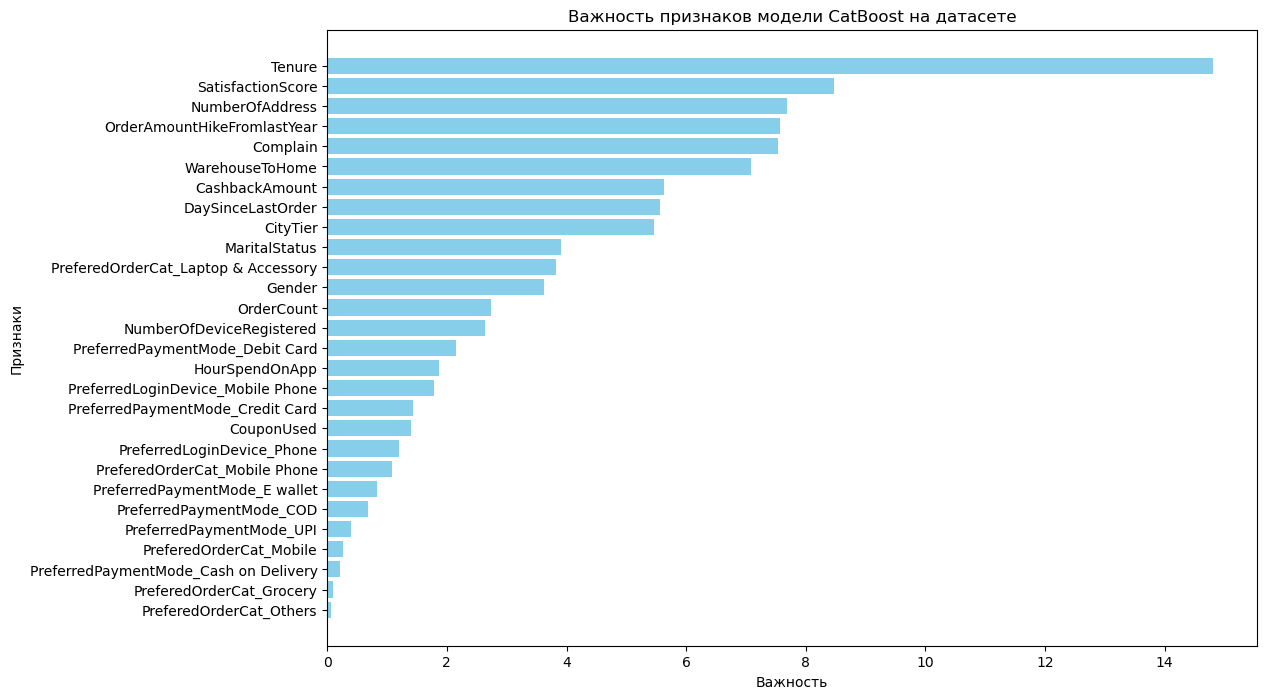

In [75]:
from catboost import CatBoostClassifier, Pool

importances = best_model_cat.get_feature_importance(Pool(X_train, label=y_train))
features = X.columns

# Создание DataFrame для сортировки
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.title('Важность признаков модели CatBoost на датасете')
plt.show()

In [76]:
xgboost_model = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],       # Скорость обучения
    'n_estimators': [100, 200, 300],         # Количество деревьев
    'max_depth': [3, 6, 9],                 # Глубина деревьев
    'reg_alpha': [0, 0.1, 1],               # L1-регуляризация
    'reg_lambda': [1, 1.5, 2]               # L2-регуляризация
}

grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=0)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_model = grid_search.best_estimator_

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 1.5}


Accuracy: 0.938
ROC_AUC: 0.9663612603038745


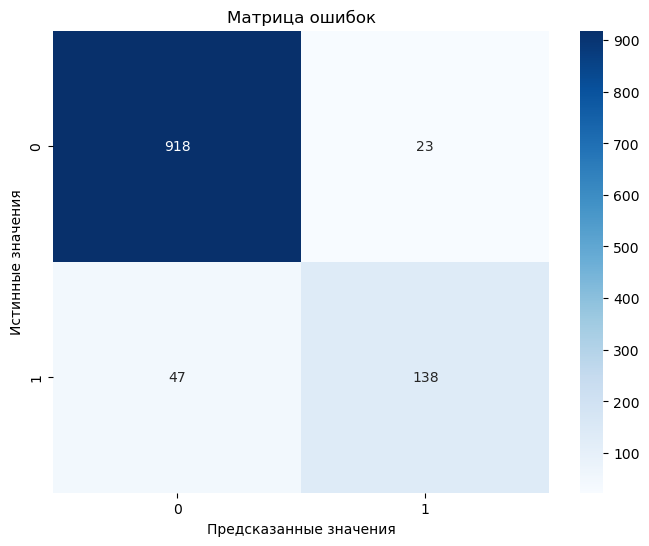

In [77]:
y_pred_xgboost = best_model.predict(X_test)
y_pred_xgboost_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_xgboost)
roc_auc_xgboost_proba = roc_auc_score(y_test, y_pred_xgboost_proba)

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_xgboost))
print(f"ROC_AUC: {roc_auc_xgboost_proba}")

conf_matrix = confusion_matrix(y_test, y_pred_xgboost)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок')
plt.show()

precision = precision_score(y_test, y_pred_xgboost)
recall = recall_score(y_test, y_pred_xgboost)
f1 = f1_score(y_test, y_pred_xgboost)

Accuracy: 0.972
ROC_AUC: 0.9751098601258006


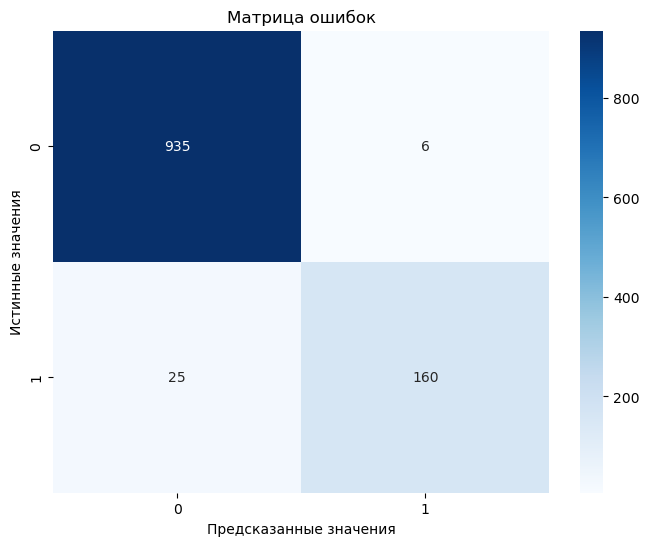

In [78]:
lgbm_model = LGBMClassifier(verbose=-200)
lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_lgbm_proba = lgbm_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_lgbm)
roc_auc_lgbm_proba = roc_auc_score(y_test, y_pred_lgbm_proba)

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_lgbm))
print(f"ROC_AUC: {roc_auc_lgbm_proba}")

conf_matrix = confusion_matrix(y_test, y_pred_lgbm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок')
plt.show()

precision = precision_score(y_test, y_pred_lgbm)
recall = recall_score(y_test, y_pred_lgbm)
f1 = f1_score(y_test, y_pred_lgbm)

# Regression

In [79]:
df

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,...,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,1,4.0,3,6.0,0,3.0,3,2,1,9,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,9.0,1,8.0,1,3.0,4,3,1,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,9.0,1,30.0,1,2.0,4,3,1,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0.0,3,15.0,1,2.0,4,5,1,8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.0,1,12.0,1,3.0,3,5,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,1,3.0,2,1,2,6,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5626,0,13.0,1,13.0,1,3.0,5,5,2,6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5627,0,1.0,1,11.0,1,3.0,2,4,2,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5628,0,23.0,3,9.0,1,4.0,5,4,2,4,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [80]:
X = df.drop(columns = ['CashbackAmount'])
y = df['CashbackAmount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 28)
(1126, 28)
(4504,)
(1126,)


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [84]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

metrics = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'R2'],
    'Value' : [mse, mae, rmse, r2]
})
metrics

,Metric,Value
0,MSE,311.128280
1,MAE,10.989533
2,RMSE,17.638829
3,R2,0.873178


In [86]:
RF_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],           # Число деревьев в ансамбле
    'max_depth': [1, 10],          # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],          # Минимальное число образцов для разбиения
    'min_samples_leaf': [1, 2, 5]            # Минимальное число образцов в листья
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=5, scoring='r2', verbose=0)

# Обучение
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [87]:
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

metrics = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'R2'],
    'Value' : [mse, mae, rmse, r2]
})
metrics

,Metric,Value
0,MSE,214.314417
1,MAE,7.702576
2,RMSE,14.639481
3,R2,0.912641
